# Problem 2

In [1]:
import numpy as np
import networkx as nx 

### (1) Find the densest subgraph using the Charikar greedy algorithm

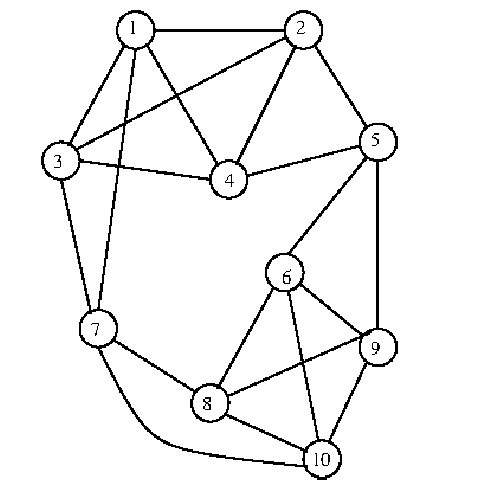

In [7]:
nodes = list(range(1,11))

edges = [
    (1,2),
    (1,3),
    (1,4),
    (1,7),
    (2,3),
    (2,4),
    (2,5),
    (3,4),
    (3,7),
    (4,5),
    (5,6),
    (5,9),
    (6,8),
    (6,9),
    (6,10),
    (7,8),
    (7,10),
    (8,9),
    (8,10),
    (9,10)
]

In [8]:
# Adjacency matrix

A = np.zeros((10,10))

for e in edges:
    A[e[0] - 1, e[1] - 1] = 1
    A[e[1] - 1, e[0] - 1] = 1

# Degree matrix

D = np.sum(A, axis = 0)

# Laplacian matrix

L = D - A

# Adjacency lists

adj_lists = {v:[] for v in nodes}

for e in edges:
    adj_lists[e[0]].append(e[1])
    adj_lists[e[1]].append(e[0])

In [9]:
adj_lists

{1: [2, 3, 4, 7],
 2: [1, 3, 4, 5],
 3: [1, 2, 4, 7],
 4: [1, 2, 3, 5],
 5: [2, 4, 6, 9],
 6: [5, 8, 9, 10],
 7: [1, 3, 8, 10],
 8: [6, 7, 9, 10],
 9: [5, 6, 8, 10],
 10: [6, 7, 8, 9]}

In [10]:
def Greedy_Densest_Subgraph(
        adj_lists:dict
        ) -> list:
    
    S = list(adj_lists.keys())

    S_G = list(adj_lists.keys())

    f_SG = 0.5*sum(map(lambda x: len(adj_lists[x]), adj_lists))/len(S)
    print(f_SG)
    
    while len(S) > 1:

        v = min(adj_lists, key = lambda k: len(adj_lists[k]))

        S.remove(v)

        adj_lists = {u : [node for node in adj_lists[u] if node != v] for u in list(adj_lists.keys()) if u != v}

        print(adj_lists)
        
        f_S = 0.5*sum(map(lambda x: len(adj_lists[x]), adj_lists))/len(S)
        print(f_S)
        
        if f_S >= f_SG:
               
               f_SG = f_S

               S_G = S

    return S_G

In [11]:
Greedy_Densest_Subgraph(adj_lists)

2.0
{2: [3, 4, 5], 3: [2, 4, 7], 4: [2, 3, 5], 5: [2, 4, 6, 9], 6: [5, 8, 9, 10], 7: [3, 8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.7777777777777777
{3: [4, 7], 4: [3, 5], 5: [4, 6, 9], 6: [5, 8, 9, 10], 7: [3, 8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.625
{4: [5], 5: [4, 6, 9], 6: [5, 8, 9, 10], 7: [8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.5714285714285714
{5: [6, 9], 6: [5, 8, 9, 10], 7: [8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.6666666666666667
{6: [8, 9, 10], 7: [8, 10], 8: [6, 7, 9, 10], 9: [6, 8, 10], 10: [6, 7, 8, 9]}
1.6
{6: [8, 9, 10], 8: [6, 9, 10], 9: [6, 8, 10], 10: [6, 8, 9]}
1.5
{8: [9, 10], 9: [8, 10], 10: [8, 9]}
1.0
{9: [10], 10: [9]}
0.5
{10: []}
0.0


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]